In [21]:
from feature_extractor import *
from preprocessor import *

import matplotlib.pyplot as plt
import numpy as np


In [22]:
#only for ipynb
from IPython.display import clear_output, Image, display
import PIL.Image
import io

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [23]:


filename = 's1.jpg'
src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


In [24]:

otsu_thresh = applyOtsu(src)
src = otsu_thresh

blobs = extract_blob(src)
largestBlob = getLblob(blobs)
testy1 = largestBlob.lowerY
testy2 = largestBlob.upperY

testx1 = largestBlob.lowerX
testx2 = largestBlob.upperX
#print(testx1, testx2, testy1, testy2)
slice = make_copy(src,testy1, testy2, testx1, testx2)

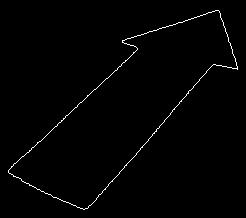

In [25]:

outline = simpleEdge(slice)
showarray(outline)



In [27]:
cdst = np.copy(outline)
#TODO : Take the parameters here
lines_points , height= openCV_houghlines(cdst,r_res=1, theta_res=np.pi/180, int_thresh=50, l=None, minPoint_line=25, maxLine_gap=10)
#print(lines_points)
lines_Eqns = get_lines(lines_points)
showarray(cdst)

TypeError: openCV_houghlines() got an unexpected keyword argument 'r_res'

In [ ]:

vertices = get_vertices(lines_points)
distances = get_distances(lines_Eqns, vertices)
dir_vector = get_arrow_vector(lines_Eqns[distances[0]], vertices[distances[1]], height)

In [ ]:

l = lines_points[distances[0]][0]

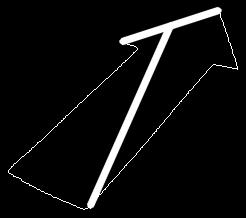

In [ ]:

cv2.line(outline, (l[0],l[1]), (l[2],l[3]), (255,255,255), 5, cv2.LINE_AA)
cv2.line(outline, (vertices[distances[1]][0], vertices[distances[1]][1]), ((l[0]+l[2])//2,  (l[1]+l[3])//2), (255,255,255), 5, cv2.LINE_AA)
showarray(outline)


In [ ]:

print(dir_vector)


287.89613292503924
